<a href="https://colab.research.google.com/github/AlexRoman938/California_Housing_ML_Course/blob/main/Predicci%C3%B3n%20de%20Viviendas%20usando%20Modelos%20Lineales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style("darkgrid")

In [ ]:
df_housing = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')
df_housing #ver dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
#Ver info del dataset
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Aquí podemos ver que la columna total_bedroms tiene datos nulos

In [ ]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
#Ver columnas
df_housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

#Exploración de datos

In [ ]:
# ¿Existen datos nulos? 

df_housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

En esta sección quiero analizar las variables que creo que pueden afectar a la variable objetivo que es median_house_value.

##Housing Media Age

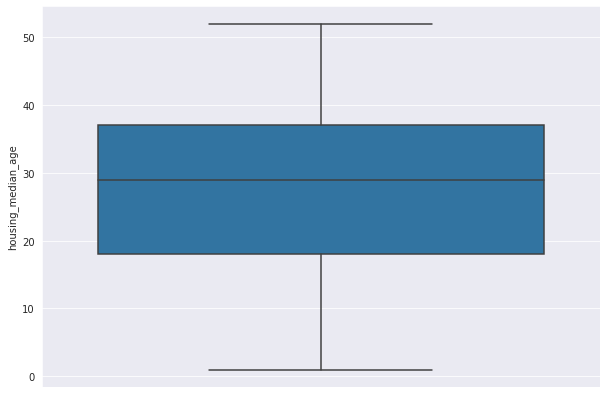

In [ ]:
#Ver boxplot, para verificar si tenemos datos outliers
plt.figure(figsize=(10,7))
sns.boxplot(data = df_housing, y = 'housing_median_age')

No hay datos outliers

## Total rooms

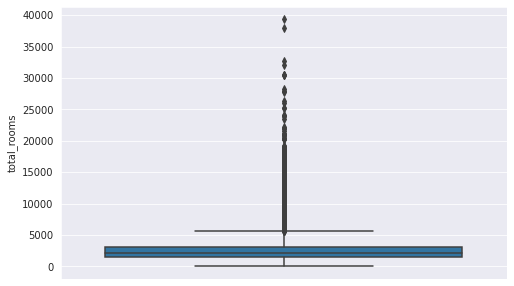

In [ ]:
#Ver boxplot, para verificar si tenemos datos outliers
plt.figure(figsize=(8,5))
sns.boxplot(data = df_housing, y = 'total_rooms')

Podemos observar que existen muchos datos outliers en el gráfico.

## Total Bedrooms

In [ ]:
#Como aquí sabemos que existen datos nulos, quiero saber cuantos son

df_housing['total_bedrooms'].isnull().sum()

207

Tenemos 207 datos nulos

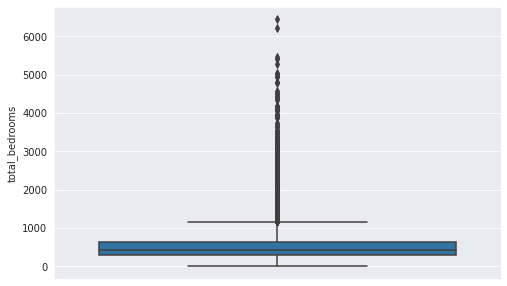

In [ ]:
#Ver boxplot, para verificar si tenemos datos outliers
plt.figure(figsize=(8,5))
sns.boxplot(data = df_housing, y = 'total_bedrooms')

Al igual que rooms. Existen muchos datos outliers.

## Population

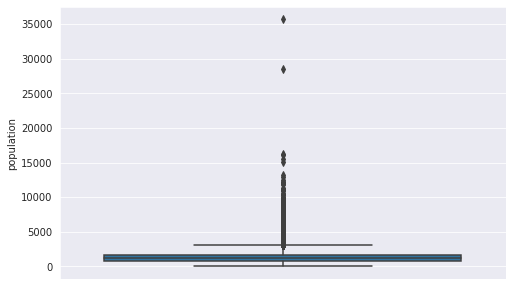

In [ ]:
#Ver boxplot, para verificar si tenemos datos outliers
plt.figure(figsize=(8,5))
sns.boxplot(data = df_housing, y = 'population')

Hay outliers

## Households

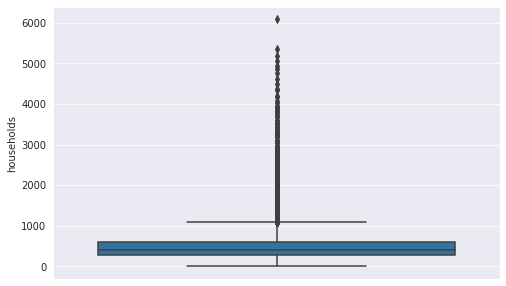

In [ ]:
#Ver boxplot, para verificar si tenemos datos outliers
plt.figure(figsize=(8,5))
sns.boxplot(data = df_housing, y = 'households')

Hay outliers

##Median_income

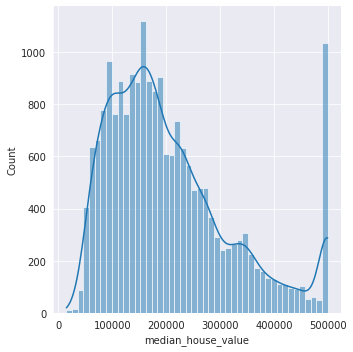

In [ ]:
#Ver distribucion
sns.displot(data = df_housing, x= 'median_house_value', kde = True)

No tiene distribucion normal

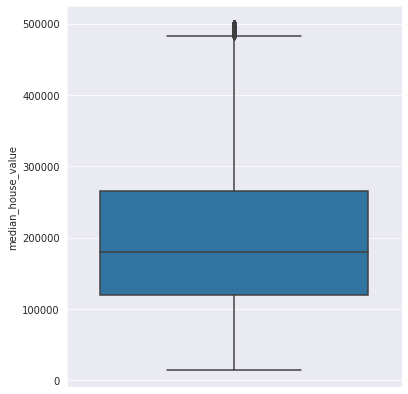

In [ ]:
#Ver boxplot, para verificar si tenemos datos outliers
plt.figure(figsize=(6,7))
sns.boxplot(data = df_housing, y = 'median_house_value')

Tenemos datos outliers

## Ocean - Proximity

In [ ]:
df_housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

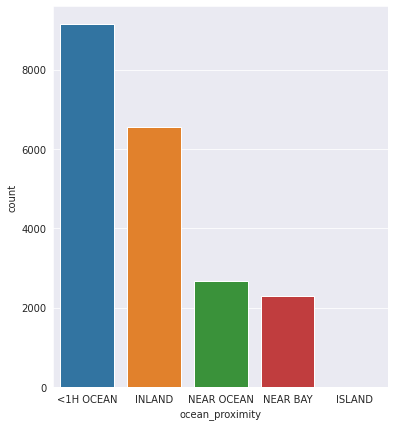

In [ ]:
plt.figure(figsize=(6,7))
sns.countplot(data = df_housing , x = 'ocean_proximity' , order = df_housing['ocean_proximity'].value_counts().index)

Podemos ver que hay más casas a más de 1 hora del oceano

¿La variable ocean proximity influye en median_house_value?

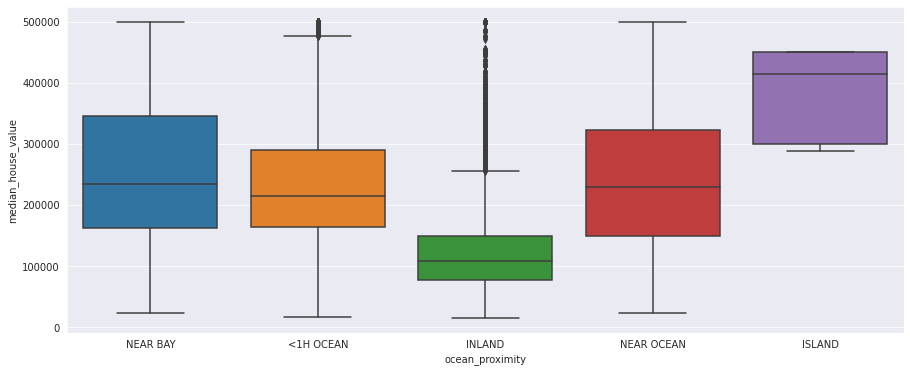

In [ ]:
#View boxplot with these genres
plt.figure(figsize=(15,6))
sns.boxplot(x= 'ocean_proximity', y = 'median_house_value' , data= df_housing)

Según los resultados del gráfico. La mayoría de las casas que tengan ocean_proximity en ISLAND son los más caros. Por otro lado, los que tienen INLAND son los más baratos.

Puedo afirmar que si afecta el ocean_proximity.

## CORRELATION

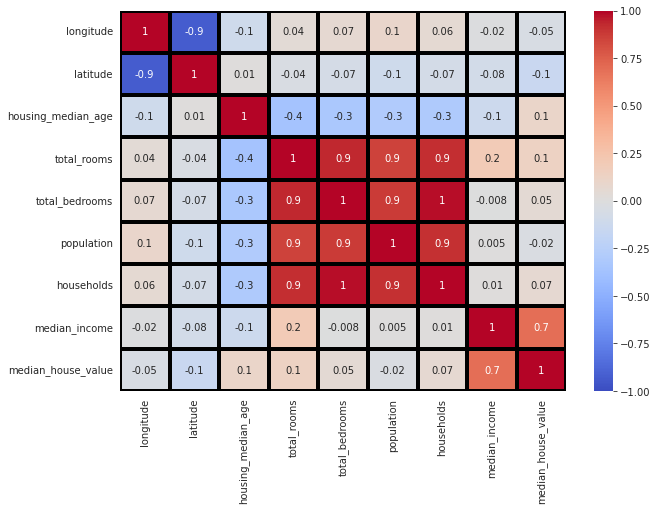

In [ ]:
plt.figure(figsize=(10,7))

#Correlacion entre las variables
sns.heatmap(df_housing.corr() , annot = True , fmt = '.1g' , vmin = -1 , vmax = 1 , cmap = 'coolwarm' ,
            linewidths=3, linecolor='black')

Aquí puedo afirmar que el valor de la casa esta positivamente fuerte correlacionado a la variable median_income.

Quiero ver la gráfica entre estos 2. Ya que estan fuertemente correlacionados

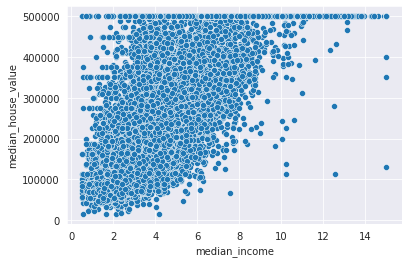

In [ ]:
sns.scatterplot(data = df_housing, x = 'median_income' , y = 'median_house_value')

Puedo ver que hay datos atípicos en este gráfico

##RESUMEN

•En total_beedrooms tenemos 207 datos faltantes.

•Anomalias entre el gráfico de median_income y median_house_value.

•Muchos datos atípicos en la variables: total_rooms, total_bedrooms, population y households.

•Aproximity_Ocean "ISLAND" la mayoría de sus casas son las más carás.

# Preprocesamiento de datos

Probaré 4 cosas. 

df_experiment = Un dataset con estandarización, imputando datos nulos por la media, usando ordinal encoder para lidiar con los datos categoricos, eliminando las variables longitude y latitude. Usando PCA y Regularización.

df_experiment2 = Un dataset sin estandarización, imputando datos imputando datos nulos por la media, usando ordinal encoder para lidiar con los datos categoricos, eliminando las variables longitude y latitude. Usando Regularización y Polynomial Regression.

df_experiment3 = Un dataset con estandarización, imputando datos imputando datos nulos por la media, usando ordinal encoder para lidiar con los datos categoricos, eliminando las variables longitude y latitude. Usando Regularización y Polynomial Regression.

df_experiment4 = Un dataset sin estandarización, imputando datos imputando datos nulos por la media, usando ordinal encoder para lidiar con los datos categoricos, eliminando las variables longitude y latitude. Usando PCA y Regularización.

In [ ]:
#Creando df_experiment
df_experiment = df_housing.copy()

In [ ]:
#Eliminando las variables longitude y latitude en el housing principal
df_experiment.drop(['longitude', 'latitude'], axis = 1, inplace = True)

In [ ]:
#Imputar datos
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") #usamos la mediana

df_experiment['total_bedrooms'] = imputer.fit_transform(df_experiment[['total_bedrooms']])

In [ ]:
df_experiment['total_bedrooms'].isnull().sum() #Ya no verá nulos en total_bedrooms

0

In [ ]:
#Ordinal Enconder
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

df_experiment['ocean_proximity'] = ordinal_encoder.fit_transform(df_experiment[['ocean_proximity']])

In [ ]:
#Mostrar el dataset con el ordinal encoder hecho
df_experiment.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0


In [ ]:
#creando los experiment
df_experiment2 = df_experiment.copy()
df_experiment3 = df_experiment.copy()
df_experiment4 = df_experiment.copy()

In [ ]:
#Estandarizando df_experiment y df_experiment3
from sklearn.preprocessing import StandardScaler

standar_scaler = StandardScaler()

val = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income']

df_experiment[val] = standar_scaler.fit_transform(df_experiment[val])
df_experiment3[val] = standar_scaler.fit_transform(df_experiment3[val])

#SEPARANDO DATOS y TRAIN TEST SPLIT

In [ ]:
v_ind = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income','ocean_proximity'] #variables independientes

#df_experiment
X = df_experiment[v_ind].values
y = df_experiment['median_house_value'] #variable dependiente ( objetivo ) 


#df_experiment2
X2 = df_experiment2[v_ind].values
y2 = df_experiment2['median_house_value'] #variable dependiente ( objetivo )



#df_experiment3
X3 = df_experiment3[v_ind].values
y3 = df_experiment3['median_house_value'] #variable dependiente ( objetivo )


#df_experiment4
X4 = df_experiment4[v_ind].values
y4 = df_experiment4['median_house_value'] #variable dependiente ( objetivo )

In [ ]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 81) #Del df_experiment

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 82) #Del df_experiment2

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state = 83) #Del df_experiment3

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.2, random_state = 84) #Del df_experiment4


#MACHINE LEARNING MODELS

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [ ]:
#Métricas para modelos de regresión
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error

##df_experiment

In [ ]:
pca_experiment =  PCA(n_components= 3) #pusimos que haya 3 componentes
pca_experiment.fit(X_train)

PCA(n_components=3)

In [ ]:
#Variables Xtrain y Xtest también estarán con efecto del PCA
pca_X_train = pca_experiment.transform(X_train)
pca_X_test = pca_experiment.transform(X_test)

In [ ]:
regresion_lineal_experiment = LinearRegression().fit(pca_X_train, y_train) #Regresión Lineal
lasso_experiment = Lasso(alpha=0.02, random_state = 80 ).fit(pca_X_train, y_train) #Lasso
ridge_experiment = Ridge(random_state = 80).fit(pca_X_train, y_train) #Ridge

In [ ]:
#Predicciones
y_lineal_experiment = regresion_lineal_experiment.predict(pca_X_test)
y_lasso_experiment =  lasso_experiment.predict(pca_X_test)
y_ridge_experiment =  ridge_experiment.predict(pca_X_test)

In [ ]:
#regresión lineal
r_square_lineal_experiment = r2_score(y_test , y_lineal_experiment)
print('R_SQUARE: ' , r_square_lineal_experiment)
mae_lineal_experiment = mean_absolute_error(y_test , y_lineal_experiment)
print('MAE: ', mae_lineal_experiment)
mse_lineal_experiment = mean_squared_error(y_test , y_lineal_experiment)
print('MSE: ' , mse_lineal_experiment)
rmse_lineal_experiment = mse_lineal_experiment ** 0.5
print('RMSE: ' , rmse_lineal_experiment)

R_SQUARE:  0.3426679614687156
MAE:  72431.44411253644
MSE:  8877320819.078049
RMSE:  94219.53523064125


In [ ]:
#lasso
r_square_lasso_experiment = r2_score(y_test , y_lasso_experiment)
print('R_SQUARE: ' , r_square_lasso_experiment)
mae_lasso_experiment = mean_absolute_error(y_test , y_lasso_experiment)
print('MAE: ', mae_lasso_experiment)
mse_lasso_experiment = mean_squared_error(y_test , y_lasso_experiment)
print('MSE: ' , mse_lasso_experiment)
rmse_lasso_experiment = mse_lasso_experiment ** 0.5
print('RMSE: ' , rmse_lasso_experiment)

R_SQUARE:  0.3426679520858189
MAE:  72431.44488897844
MSE:  8877320945.794806
RMSE:  94219.53590309605


In [ ]:
#ridge
r_square_ridge_experiment= r2_score(y_test , y_ridge_experiment)
print('R_SQUARE: ' , r_square_ridge_experiment)
mae_ridge_experiment = mean_absolute_error(y_test , y_ridge_experiment)
print('MAE: ', mae_ridge_experiment)
mse_ridge_experiment = mean_squared_error(y_test , y_ridge_experiment)
print('MSE: ' , mse_ridge_experiment)
rmse_ridge_experiment = mse_ridge_experiment ** 0.5
print('RMSE: ' , rmse_ridge_experiment)

R_SQUARE:  0.34266672272559684
MAE:  72431.61543869355
MSE:  8877337548.401182
RMSE:  94219.62400902045


##df_experiment2

In [ ]:
#Polynomial
poly_features_experiment2 = PolynomialFeatures(degree = 2 , include_bias= False)
poly_features_experiment2.fit(X2_train)

PolynomialFeatures(include_bias=False)

In [ ]:
#Variables X2_train y X2_test estarán bajo efecto del poly_feature
poly_X2_train = poly_features_experiment2.transform(X2_train)
poly_X2_test = poly_features_experiment2.transform(X2_test)

In [ ]:
regresion_lineal_experiment2 = LinearRegression().fit(poly_X2_train, y2_train) #Regresión Lineal
lasso_experiment2 = Lasso(alpha=0.02, random_state = 80 ).fit(poly_X2_train, y2_train) #Lasso
ridge_experiment2 = Ridge(random_state = 80).fit(poly_X2_train, y2_train) #Ridge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.729e+13, tolerance: 2.192e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.96987e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [ ]:
#Predicciones
y_lineal_experiment2 = regresion_lineal_experiment2.predict(poly_X2_test)
y_lasso_experiment2 =  lasso_experiment2.predict(poly_X2_test)
y_ridge_experiment2 =  ridge_experiment2.predict(poly_X2_test)

In [ ]:
#regresión lineal
r_square_lineal_experiment2 = r2_score(y2_test , y_lineal_experiment2)
print('R_SQUARE: ' , r_square_lineal_experiment2)
mae_lineal_experiment2 = mean_absolute_error(y2_test , y_lineal_experiment2)
print('MAE: ', mae_lineal_experiment2)
mse_lineal_experiment2 = mean_squared_error(y2_test , y_lineal_experiment2)
print('MSE: ' , mse_lineal_experiment2)
rmse_lineal_experiment2 = mse_lineal_experiment2 ** 0.5
print('RMSE: ' , rmse_lineal_experiment2)

R_SQUARE:  0.6569865757456043
MAE:  48919.91856213697
MSE:  4618634741.51347
RMSE:  67960.53811965787


In [ ]:
#lasso
r_square_lasso_experiment2 = r2_score(y2_test , y_lasso_experiment2)
print('R_SQUARE: ' , r_square_lasso_experiment2)
mae_lasso_experiment2 = mean_absolute_error(y2_test , y_lasso_experiment2)
print('MAE: ', mae_lasso_experiment2)
mse_lasso_experiment2 = mean_squared_error(y2_test , y_lasso_experiment2)
print('MSE: ' , mse_lasso_experiment2)
rmse_lasso_experiment2 = mse_lasso_experiment2 ** 0.5
print('RMSE: ' , rmse_lasso_experiment2)

R_SQUARE:  0.6555311201199203
MAE:  48998.37903376019
MSE:  4638232277.476171
RMSE:  68104.56869752698


In [ ]:
#ridge
r_square_ridge_experiment2 = r2_score(y2_test , y_ridge_experiment2)
print('R_SQUARE: ' , r_square_ridge_experiment2)
mae_ridge_experiment2 = mean_absolute_error(y2_test , y_ridge_experiment2)
print('MAE: ', mae_ridge_experiment2)
mse_ridge_experiment2 = mean_squared_error(y2_test , y_ridge_experiment2)
print('MSE: ' , mse_ridge_experiment2)
rmse_ridge_experiment2 = mse_ridge_experiment2 ** 0.5
print('RMSE: ' , rmse_ridge_experiment2)

R_SQUARE:  0.6569876853146286
MAE:  48919.9381583914
MSE:  4618619801.299233
RMSE:  67960.42820126454


##df_experiment3

In [ ]:
#Polynomial
poly_features_experiment3 = PolynomialFeatures(degree = 2 , include_bias= False)
poly_features_experiment3.fit(X3_train)

PolynomialFeatures(include_bias=False)

In [ ]:
#Variables X3_train y X3_test estarán bajo efecto del poly_feature
poly_X3_train = poly_features_experiment3.transform(X3_train)
poly_X3_test = poly_features_experiment3.transform(X3_test)

In [ ]:
regresion_lineal_experiment3 = LinearRegression().fit(poly_X3_train, y3_train) #Regresión Lineal
lasso_experiment3 = Lasso(alpha=0.02, random_state = 80 ).fit(poly_X3_train, y3_train) #Lasso
ridge_experiment3 = Ridge(random_state = 80).fit(poly_X3_train, y3_train) #Ridge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.740e+13, tolerance: 2.229e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
#Predicciones
y_lineal_experiment3 = regresion_lineal_experiment2.predict(poly_X3_test)
y_lasso_experiment3 =  lasso_experiment2.predict(poly_X3_test)
y_ridge_experiment3 =  ridge_experiment2.predict(poly_X3_test)

In [ ]:
#regresión lineal
r_square_lineal_experiment3 = r2_score(y3_test , y_lineal_experiment3)
print('R_SQUARE: ' , r_square_lineal_experiment3)
mae_lineal_experiment3 = mean_absolute_error(y3_test , y_lineal_experiment3)
print('MAE: ', mae_lineal_experiment3)
mse_lineal_experiment3 = mean_squared_error(y3_test , y_lineal_experiment3)
print('MSE: ' , mse_lineal_experiment3)
rmse_lineal_experiment3 = mse_lineal_experiment3 ** 0.5
print('RMSE: ' , rmse_lineal_experiment3)

R_SQUARE:  -1.9947417602156365
MAE:  174316.90553145227
MSE:  37670888327.261
RMSE:  194089.89754044646


In [ ]:
#lasso
r_square_lasso_experiment3 = r2_score(y3_test , y_lasso_experiment3)
print('R_SQUARE: ' , r_square_lasso_experiment3)
mae_lasso_experiment3 = mean_absolute_error(y3_test , y_lasso_experiment3)
print('MAE: ', mae_lasso_experiment3)
mse_lasso_experiment3 = mean_squared_error(y3_test , y_lasso_experiment3)
print('MSE: ' , mse_lasso_experiment3)
rmse_lasso_experiment3 = mse_lasso_experiment3 ** 0.5
print('RMSE: ' , rmse_lasso_experiment3)

R_SQUARE:  -1.9629873316342978
MAE:  172863.31583205622
MSE:  37271449033.73825
RMSE:  193058.14935852424


In [ ]:
#ridge
r_square_ridge_experiment3 = r2_score(y3_test , y_ridge_experiment3)
print('R_SQUARE: ' , r_square_ridge_experiment3)
mae_ridge_experiment3 = mean_absolute_error(y3_test , y_ridge_experiment3)
print('MAE: ', mae_ridge_experiment3)
mse_ridge_experiment3 = mean_squared_error(y3_test , y_ridge_experiment3)
print('MSE: ' , mse_ridge_experiment3)
rmse_ridge_experiment3 = mse_ridge_experiment3 ** 0.5
print('RMSE: ' , rmse_ridge_experiment3)

R_SQUARE:  -1.9933938145998837
MAE:  174278.30749511896
MSE:  37653932505.08066
RMSE:  194046.21229253782


##df_experiment4

In [ ]:
pca_experiment4 =  PCA(n_components= 3) #pusimos que haya 3 componentes
pca_experiment4.fit(X4_train)

PCA(n_components=3)

In [ ]:
#Variables X4train y X4test también estarán con efecto del PCA
pca_X4_train = pca_experiment.transform(X4_train)
pca_X4_test = pca_experiment.transform(X4_test)

In [ ]:
regresion_lineal_experiment4 = LinearRegression().fit(pca_X4_train, y4_train) #Regresión Lineal
lasso_experiment4 = Lasso(alpha=0.02, random_state = 80 ).fit(pca_X4_train, y4_train) #Lasso
ridge_experiment4 = Ridge(random_state = 80).fit(pca_X4_train, y4_train) #Ridge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.932e+13, tolerance: 2.206e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
y_lineal_experiment4 = regresion_lineal_experiment.predict(pca_X4_test)
y_lasso_experiment4 =  lasso_experiment.predict(pca_X4_test)
y_ridge_experiment4 =  ridge_experiment.predict(pca_X4_test)

In [ ]:
#regresión lineal
r_square_lineal_experiment4 = r2_score(y4_test , y_lineal_experiment4)
print('R_SQUARE: ' , r_square_lineal_experiment4)
mae_lineal_experiment4 = mean_absolute_error(y4_test , y_lineal_experiment4)
print('MAE: ', mae_lineal_experiment4)
mse_lineal_experiment4 = mean_squared_error(y4_test , y_lineal_experiment4)
print('MSE: ' , mse_lineal_experiment4)
rmse_lineal_experiment4 = mse_lineal_experiment4 ** 0.5
print('RMSE: ' , rmse_lineal_experiment4)

R_SQUARE:  -7242.462858954942
MAE:  6224817.107056249
MSE:  95024507529526.5
RMSE:  9748051.47347543


In [ ]:
#lasso
r_square_lasso_experiment4 = r2_score(y4_test , y_lasso_experiment4)
print('R_SQUARE: ' , r_square_lasso_experiment4)
mae_lasso_experiment4 = mean_absolute_error(y4_test , y_lasso_experiment4)
print('MAE: ', mae_lasso_experiment4)
mse_lasso_experiment4 = mean_squared_error(y4_test , y_lasso_experiment4)
print('MSE: ' , mse_lasso_experiment4)
rmse_lasso_experiment4 = mse_lasso_experiment4 ** 0.5
print('RMSE: ' , rmse_lasso_experiment4)

R_SQUARE:  -7242.44007387678
MAE:  6224806.1692383485
MSE:  95024208619892.6
RMSE:  9748036.141700163


In [ ]:
#ridge
r_square_ridge_experiment4= r2_score(y4_test , y_ridge_experiment4)
print('R_SQUARE: ' , r_square_ridge_experiment4)
mae_ridge_experiment4 = mean_absolute_error(y4_test , y_ridge_experiment4)
print('MAE: ', mae_ridge_experiment4)
mse_ridge_experiment4 = mean_squared_error(y4_test , y_ridge_experiment4)
print('MSE: ' , mse_ridge_experiment4)
rmse_ridge_experiment4 = mse_ridge_experiment4 ** 0.5
print('RMSE: ' , rmse_ridge_experiment4)

R_SQUARE:  -7242.1694896481395
MAE:  6224724.293999512
MSE:  95020658918103.19
RMSE:  9747854.067337241
